# レアアース銘柄

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
name_source = "レアアース銘柄.xlsx"
df_code = pd.read_excel(name_source)
df_code

,コード,銘柄名,市場
0,1662,石油資源,東Ｐ
1,2768,双日,東Ｐ
2,3036,アルコニクス,東Ｐ
3,3556,リネットＪ,東Ｇ
4,4004,レゾナック,東Ｐ
5,4063,信越化,東Ｐ
6,5711,三菱マ,東Ｐ
7,5714,ＤＯＷＡ,東Ｐ
8,5724,アサカ理研,東Ｓ
9,5857,ＡＲＥＨＤ,東Ｐ


In [3]:
df_result = pd.DataFrame()
for code in df_code["コード"]:
    print(code)
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    ser = ticker.history(period="1y")["Close"]
    df_result[code] = ser / ser.iloc[0]
df_result

1662
2768
3036
3556
4004
4063
5711
5714
5724
5857
6269
6297
7456
8002
8015
8031
8053
8058
8103


,1662,2768,3036,3556,4004,4063,5711,5714,5724,5857,6269,6297,7456,8002,8015,8031,8053,8058,8103
Date,,,,,,,,,,,,,,,,,,,
2024-06-04 00:00:00+09:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2024-06-05 00:00:00+09:00,0.973684,0.960283,0.980861,0.994065,0.987948,0.999832,0.971419,0.959100,0.960577,0.995129,0.985821,0.996317,0.982023,0.968019,0.967667,0.981616,0.980831,0.981241,0.984743
2024-06-06 00:00:00+09:00,0.973684,0.955897,0.978127,0.958457,1.002939,1.019001,0.987205,0.982958,0.960577,0.998052,1.015299,1.001842,0.978851,0.974942,0.967028,0.974978,0.982305,0.978215,0.988904
2024-06-07 00:00:00+09:00,0.976780,0.958090,0.982912,0.970326,1.001176,1.027577,0.989864,0.976823,0.956731,0.996590,1.007836,1.020258,0.979203,0.976426,0.975537,0.981106,0.987958,0.982451,0.987517
2024-06-10 00:00:00+09:00,0.992260,0.965887,1.000000,0.976261,1.013815,1.043551,0.989199,0.974949,0.960577,0.994642,1.000746,0.994475,0.975679,0.989449,0.991278,0.984553,0.997542,0.986384,0.997226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-29 00:00:00+09:00,0.814937,0.908460,1.182208,1.255193,0.949208,0.798335,0.777646,0.781697,0.954417,0.890631,1.883598,0.963951,1.187248,1.004205,1.011322,0.798973,0.952281,0.919208,0.989019
2025-05-30 00:00:00+09:00,0.813314,0.908460,1.184997,1.240356,0.950105,0.796619,0.778854,0.781868,0.955387,0.915004,1.937196,0.950642,1.198057,1.009002,1.016620,0.798709,0.944626,0.919208,0.990491
2025-06-02 00:00:00+09:00,0.803573,0.899549,1.185695,1.228487,0.917847,0.787178,0.768150,0.766360,1.100878,0.903833,1.933368,0.954445,1.194454,1.001807,1.011322,0.786580,0.935440,0.909499,0.983132


### 日付文字列

In [4]:
dt_start = df_result.index[0]
date_str = f"{dt_start.year:04}-{dt_start.month:02}-{dt_start.day:02}"
row_last = len(df_result) - 1
dt_end = df_result.index[row_last]
date_latest_str = f"{dt_end.year:04}{dt_end.month:02}{dt_end.day:02}"
date_latest_str

'20250604'

In [5]:
df_top = df_result.iloc[row_last].sort_values(ascending=False)
n = 4
df_top.head(n)

6269    2.044393
3556    1.477745
3036    1.201737
7456    1.192653
Name: 2025-06-04 00:00:00+09:00, dtype: float64

In [6]:
list_top = list(df_top.index)
len(list_top)

19

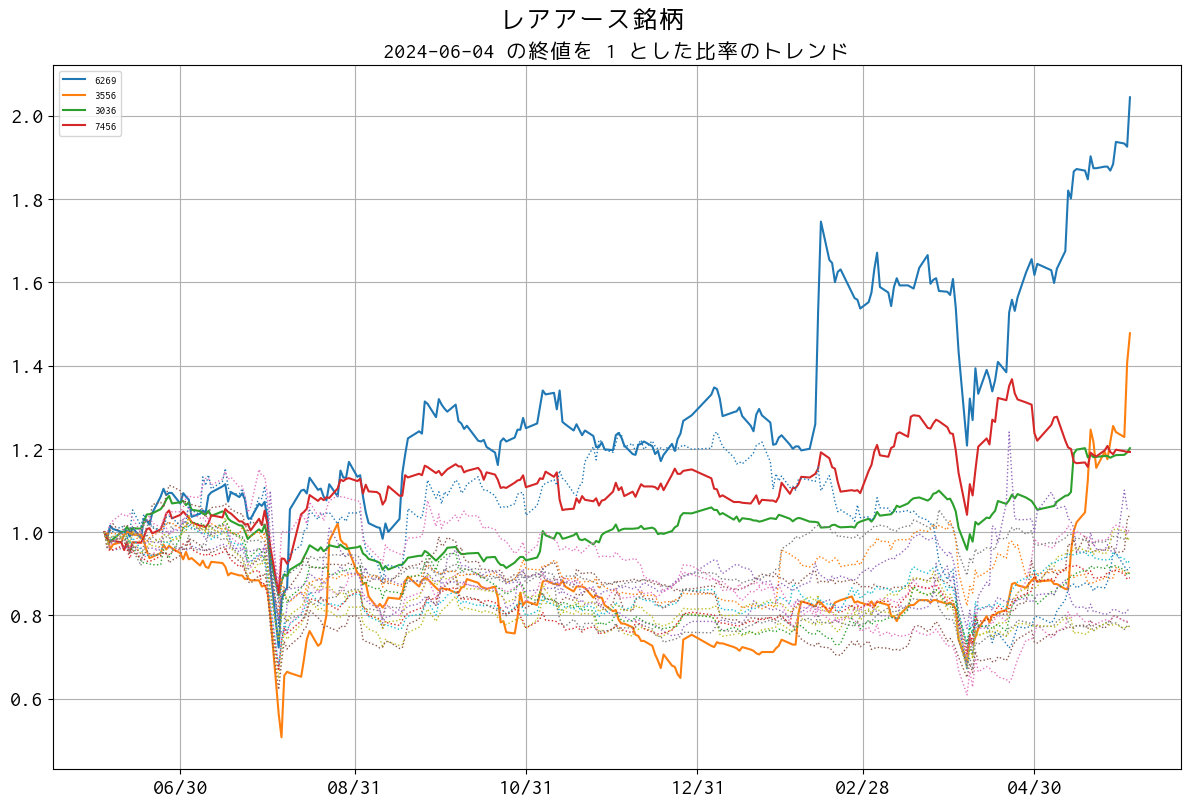

In [7]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91, left=0.05, bottom=0.03, right=0.99)

for i, colname in enumerate(list_top):
    if i < n:
        width = 1.5
        lstyle = "solid"
        ax.plot(df_result[colname], lw=width, ls=lstyle, label=colname)
    else:
        width = 1
        lstyle = "dotted"
        ax.plot(df_result[colname], lw=width, ls=lstyle)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
fig.suptitle("レアアース銘柄")
ax.set_title(f"{date_str} の終値を 1 とした比率のトレンド", fontsize=16)
ax.grid()
ax.legend(loc='upper left', fontsize=8)
#plt.tight_layout()

plt.savefig(f"screenshots/{date_latest_str}_report_rare_earth.png")
plt.show()

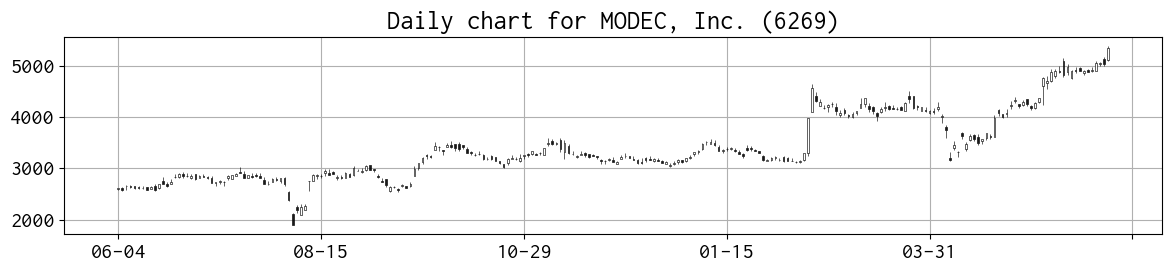

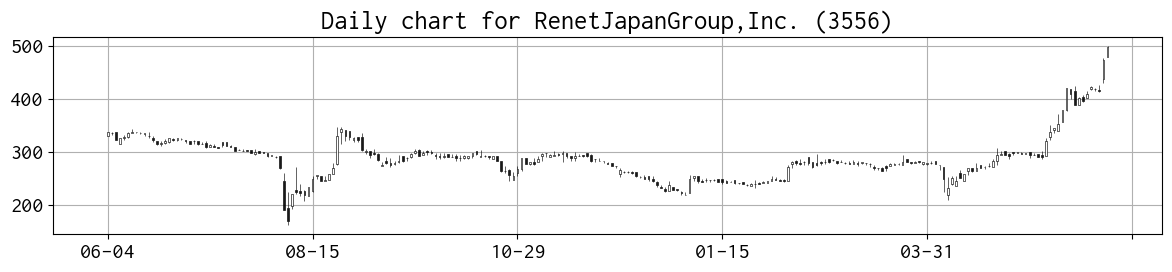

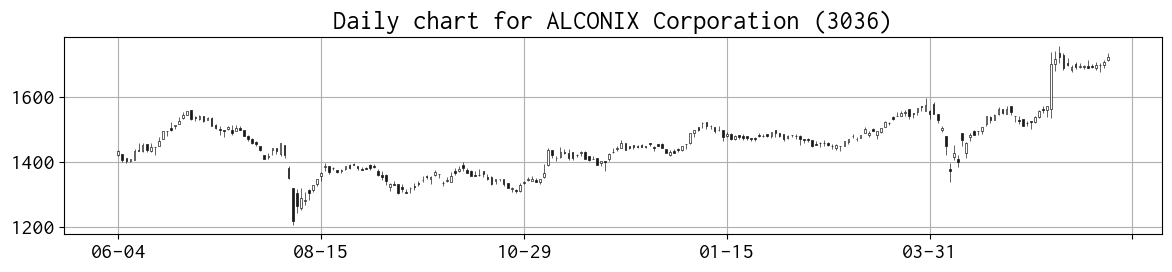

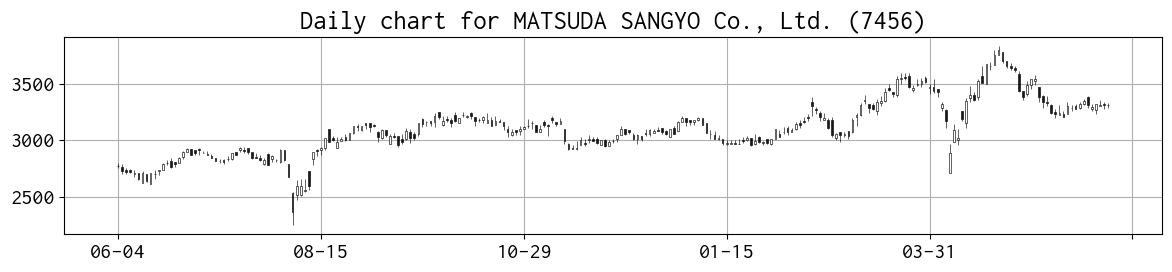

In [8]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 16

for code in list_top[0:n]:
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    df = ticker.history(period="1y")
    fig, ax = plt.subplots(figsize=(12, 3))
    mpf.plot(
        df,
        type='candle',
        style='default',
        volume=False,
        datetime_format='%m-%d',
        xrotation=0,
        ax=ax
    )
    ax.set_ylabel(None)
    ax.grid()
    ax.set_title(f"Daily chart for {ticker.info['longName']} ({code})")
    plt.tight_layout()
    plt.savefig(f"screenshots/{date_latest_str}_daily_chart_{code}.png")
    plt.show()